In [1]:
#import required modules in the project
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
%pylab inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read the data from the csv file stored locally
df=pd.read_csv("train.csv")

In [3]:
#create the new dataframe abd assign the varibale to it
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']

In [4]:
y=df['Survived']

In [5]:
X

,sex,age,pclass,sibsp,parch
0,male,22.0,3,1,0
1,female,38.0,1,1,0
2,female,26.0,3,0,0
3,female,35.0,1,1,0
4,male,35.0,3,0,0
5,male,NaN,3,0,0
6,male,54.0,1,0,0
7,male,2.0,3,3,1
8,female,27.0,3,0,2
9,female,14.0,2,1,0


In [6]:
#using one hot encoding for varibales sex and Pclass
X['sex'] = pd.get_dummies(X.sex)['female']
#Pclass
X = X.join(pd.get_dummies(df.Pclass, prefix='pclass'))
X = X.drop(['pclass_1', 'pclass'], axis=1)

In [7]:
#Lets fill all the missing values in age with the average age among the data set 
X['age'] = X['age'].fillna(X['age'].mean())

In [8]:
X

,sex,age,sibsp,parch,pclass_2,pclass_3
0,0.0,22.000000,1,0,0.0,1.0
1,1.0,38.000000,1,0,0.0,0.0
2,1.0,26.000000,0,0,0.0,1.0
3,1.0,35.000000,1,0,0.0,0.0
4,0.0,35.000000,0,0,0.0,1.0
5,0.0,29.699118,0,0,0.0,1.0
6,0.0,54.000000,0,0,0.0,0.0
7,0.0,2.000000,3,1,0.0,1.0
8,1.0,27.000000,0,2,0.0,1.0
9,1.0,14.000000,1,0,1.0,0.0


In [9]:
scaler = StandardScaler()
X= scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(penalty='l2', C=10)

In [11]:
model.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))

Logistic accuracy is 0.82


In [21]:
#lets measure the logistic model AUC
logistic_roc_auc=roc_auc_score(y_test,model.predict(X_test))

<h2>Calculate Logistic Model Accuracy using AUC score</h2>

In [22]:
print " Logistic AUC = %2.2f " % logistic_roc_auc 
print classification_report(y_test,model.predict(X_test))

 Logistic AUC = 0.81 
             precision    recall  f1-score   support

          0       0.82      0.89      0.85       105
          1       0.82      0.73      0.77        74

avg / total       0.82      0.82      0.82       179



In [14]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

<h2>ROC Curve</h2>

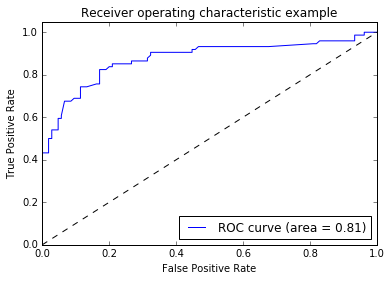

In [20]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<h1 style="color:green">The overall Logistic AUC for this model is 0.81</h1>